# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [220]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


### EXTRA

Tradução da base de dados

In [221]:
# Tradução das colunas
df.rename(columns={'Age': 'Idade', 'Gender': 'Genero',
                   'Income': 'Salario_Mensal', 'Education': 'Educacao', 
                   'Marital Status': 'Estado_Civil', 'Number of Children': 'Numero_Filhos',
                   'Home Ownership': 'Tipo_Residencia', 'Credit Score': 'Score_Credito'
                  }, inplace=True
)

In [222]:
# Tradução dos dados das colunas
df = df.replace({
    'Genero': {
        'Female': 'Feminino',
        'Male': 'Masculino'
    },
    'Educacao': {
        "Bachelor's Degree": "Diploma de Bacharel",
        "Master's Degree": "Diploma de Mestrado ",
        "Doctorate": "Doutorado",
        "High School Diploma": "Diploma de Ensino Médio ",
        "Associate's Degree": "Diploma de Nível Técnico"
    },
    'Estado_Civil': {
        'Single': 'Solteiro',
        'Married': 'Casado',
    },
    'Tipo_Residencia': {
        'Rented': 'Alugada',
        'Owned': 'Própria'
    },
    'Score_Credito': {
        'High': 'Alto',
        'Average': 'Médio',
        'Low': 'Baixo'
    }
})

In [223]:
# Base de dados traduzida
df.head(10)

,Idade,Genero,Salario_Mensal,Educacao,Estado_Civil,Numero_Filhos,Tipo_Residencia,Score_Credito
0,25.0,Feminino,"50.000,00",Diploma de Bacharel,Solteiro,0,Alugada,Alto
1,30.0,Masculino,"100.000,00",Diploma de Mestrado,Casado,2,Própria,Alto
2,35.0,Feminino,"75.000,00",Doutorado,Casado,1,Própria,Alto
3,40.0,Masculino,"125.000,00",Diploma de Ensino Médio,Solteiro,0,Própria,Alto
4,45.0,Feminino,"100.000,00",Diploma de Bacharel,Casado,3,Própria,Alto
5,50.0,Masculino,"150.000,00",Diploma de Mestrado,Casado,0,Própria,Alto
6,26.0,Feminino,"40.000,00",Diploma de Nível Técnico,Solteiro,0,Alugada,Médio
7,31.0,Masculino,"60.000,00",Diploma de Bacharel,Solteiro,0,Alugada,Médio
8,NaN,Feminino,"80.000,00",Diploma de Mestrado,Casado,2,Própria,Alto
9,NaN,Masculino,"105.000,00",Doutorado,Solteiro,0,Própria,Alto


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [160]:
#A) seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            130 non-null    float64
 1   Genero           164 non-null    object 
 2   Salario_Mensal   164 non-null    object 
 3   Educacao         164 non-null    object 
 4   Estado_Civil     164 non-null    object 
 5   Numero_Filhos    164 non-null    int64  
 6   Tipo_Residencia  164 non-null    object 
 7   Score_Credito    164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


##### A variável Age está representada em formato decimal, embora não haja necessidade de trabalhar com casas decimais, já que idade é um valor naturalmente inteiro. No entanto, essa coluna ainda contém valores nulos, o que impede o tratamento imediato; esses valores serão corrigidos posteriormente para permitir a conversão adequada.

##### A variável Income, por sua vez, não está formatada como número. Os valores seguem o padrão brasileiro (com ponto separando milhares e vírgula como separador decimal), o que impede operações matemáticas ou análises numéricas. Para tratá-la corretamente, será necessário primeiro padronizar o formato para o modelo numérico internacional — substituindo pontos e vírgulas e convertendo a coluna para tipo numérico — antes de aplicar qualquer transformação ou análise.

In [224]:
# Converção da variável Income
df['Salario_Mensal'] = (
    df['Salario_Mensal']
        .str.replace('.', '', regex=False) # Remover pontos (milhares)
        .str.replace(',', '.', regex=False) # Trocar vírgula por ponto decimal
        .astype(float)
)

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [162]:
#seu código aqui
# Verificação de dados faltantes
df.isnull().sum()

Idade              34
Genero              0
Salario_Mensal      0
Educacao            0
Estado_Civil        0
Numero_Filhos       0
Tipo_Residencia     0
Score_Credito       0
dtype: int64

In [163]:
# Percentual dos valores faltantes nas colunas
df.isnull().mean() * 100

Idade              20.731707
Genero              0.000000
Salario_Mensal      0.000000
Educacao            0.000000
Estado_Civil        0.000000
Numero_Filhos       0.000000
Tipo_Residencia     0.000000
Score_Credito       0.000000
dtype: float64

A quantidade de valores faltantes na coluna "Idade" é mínima em relação ao total. Como essa é a única coluna com dados ausentes, não é viável excluir essas linhas, pois isso impactaria variáveis que estão completas. Assim, a abordagem mais adequada é comparar a média e a mediana e decidir qual delas deve ser utilizada para substituir os valores faltantes em "Age".

In [164]:
# Média
df['Idade'].mean()

np.float64(37.50769230769231)

In [165]:
# Mediana
df['Idade'].median()

36.0

A média será utilizada para substituir os valores faltantes, pois preserva melhor a variação natural dos dados e, neste caso, não parece ser influenciada por outliers, já que a média e mediana são bastante próximas. Além disso, como a coluna "Idade" é a única com dados ausentes, o uso da média mantém a consistência do conjunto de dados sem impactar negativamente as demais variáveis.

In [225]:
# Substituição dos dados faltantes pela média em formato inteiro, pois trata-se, de uma coluna idade
df['Idade'] = df['Idade'].fillna(int(df['Idade'].mean()))

In [167]:
# Conferencia de dados faltantes
df.isnull().sum()

Idade              0
Genero             0
Salario_Mensal     0
Educacao           0
Estado_Civil       0
Numero_Filhos      0
Tipo_Residencia    0
Score_Credito      0
dtype: int64

**OBS:** 
##### Corrigindo o tipo da coluna "Idade", após o tratamento dos dados nulos.

In [226]:
# Converção da coluna "Idade"
df['Idade'] = df['Idade'].astype(int)

In [169]:
# Conferência de conversões
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            164 non-null    int64  
 1   Genero           164 non-null    object 
 2   Salario_Mensal   164 non-null    float64
 3   Educacao         164 non-null    object 
 4   Estado_Civil     164 non-null    object 
 5   Numero_Filhos    164 non-null    int64  
 6   Tipo_Residencia  164 non-null    object 
 7   Score_Credito    164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [170]:
#seu código aqui
# Verificação da váriavel categórica: Gender 
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [171]:
# Verificação da váriavel categórica: Education 
df['Educacao'].unique()

array(['Diploma de Bacharel', 'Diploma de Mestrado ', 'Doutorado',
       'Diploma de Ensino Médio ', 'Diploma de Nível Técnico'],
      dtype=object)

In [172]:
# Verificação da váriavel categórica: Marital Status 
df['Estado_Civil'].unique()

array(['Solteiro', 'Casado'], dtype=object)

In [173]:
# Verificação da váriavel categórica: Home Ownership 
df['Tipo_Residencia'].unique()

array(['Alugada', 'Própria'], dtype=object)

In [174]:
# Verificação da váriavel categórica: Credit Score 
df['Score_Credito'].unique()

array(['Alto', 'Médio', 'Baixo'], dtype=object)

Após a verificação das variáveis categóricas, foi possível concluir que não há erros de digitação ou divergências nos valores registrados. Todas as categorias apresentam nomes consistentes e dentro do padrão esperado, não sendo necessário realizar tratamento adicional.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [175]:
#seu código aqui
df.describe()

,Idade,Salario_Mensal,Numero_Filhos
count,164.000000,164.000000,164.000000
mean,37.402439,83765.243902,0.652439
std,7.564625,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


##### Não aparenta possuir outliers nesses dados.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

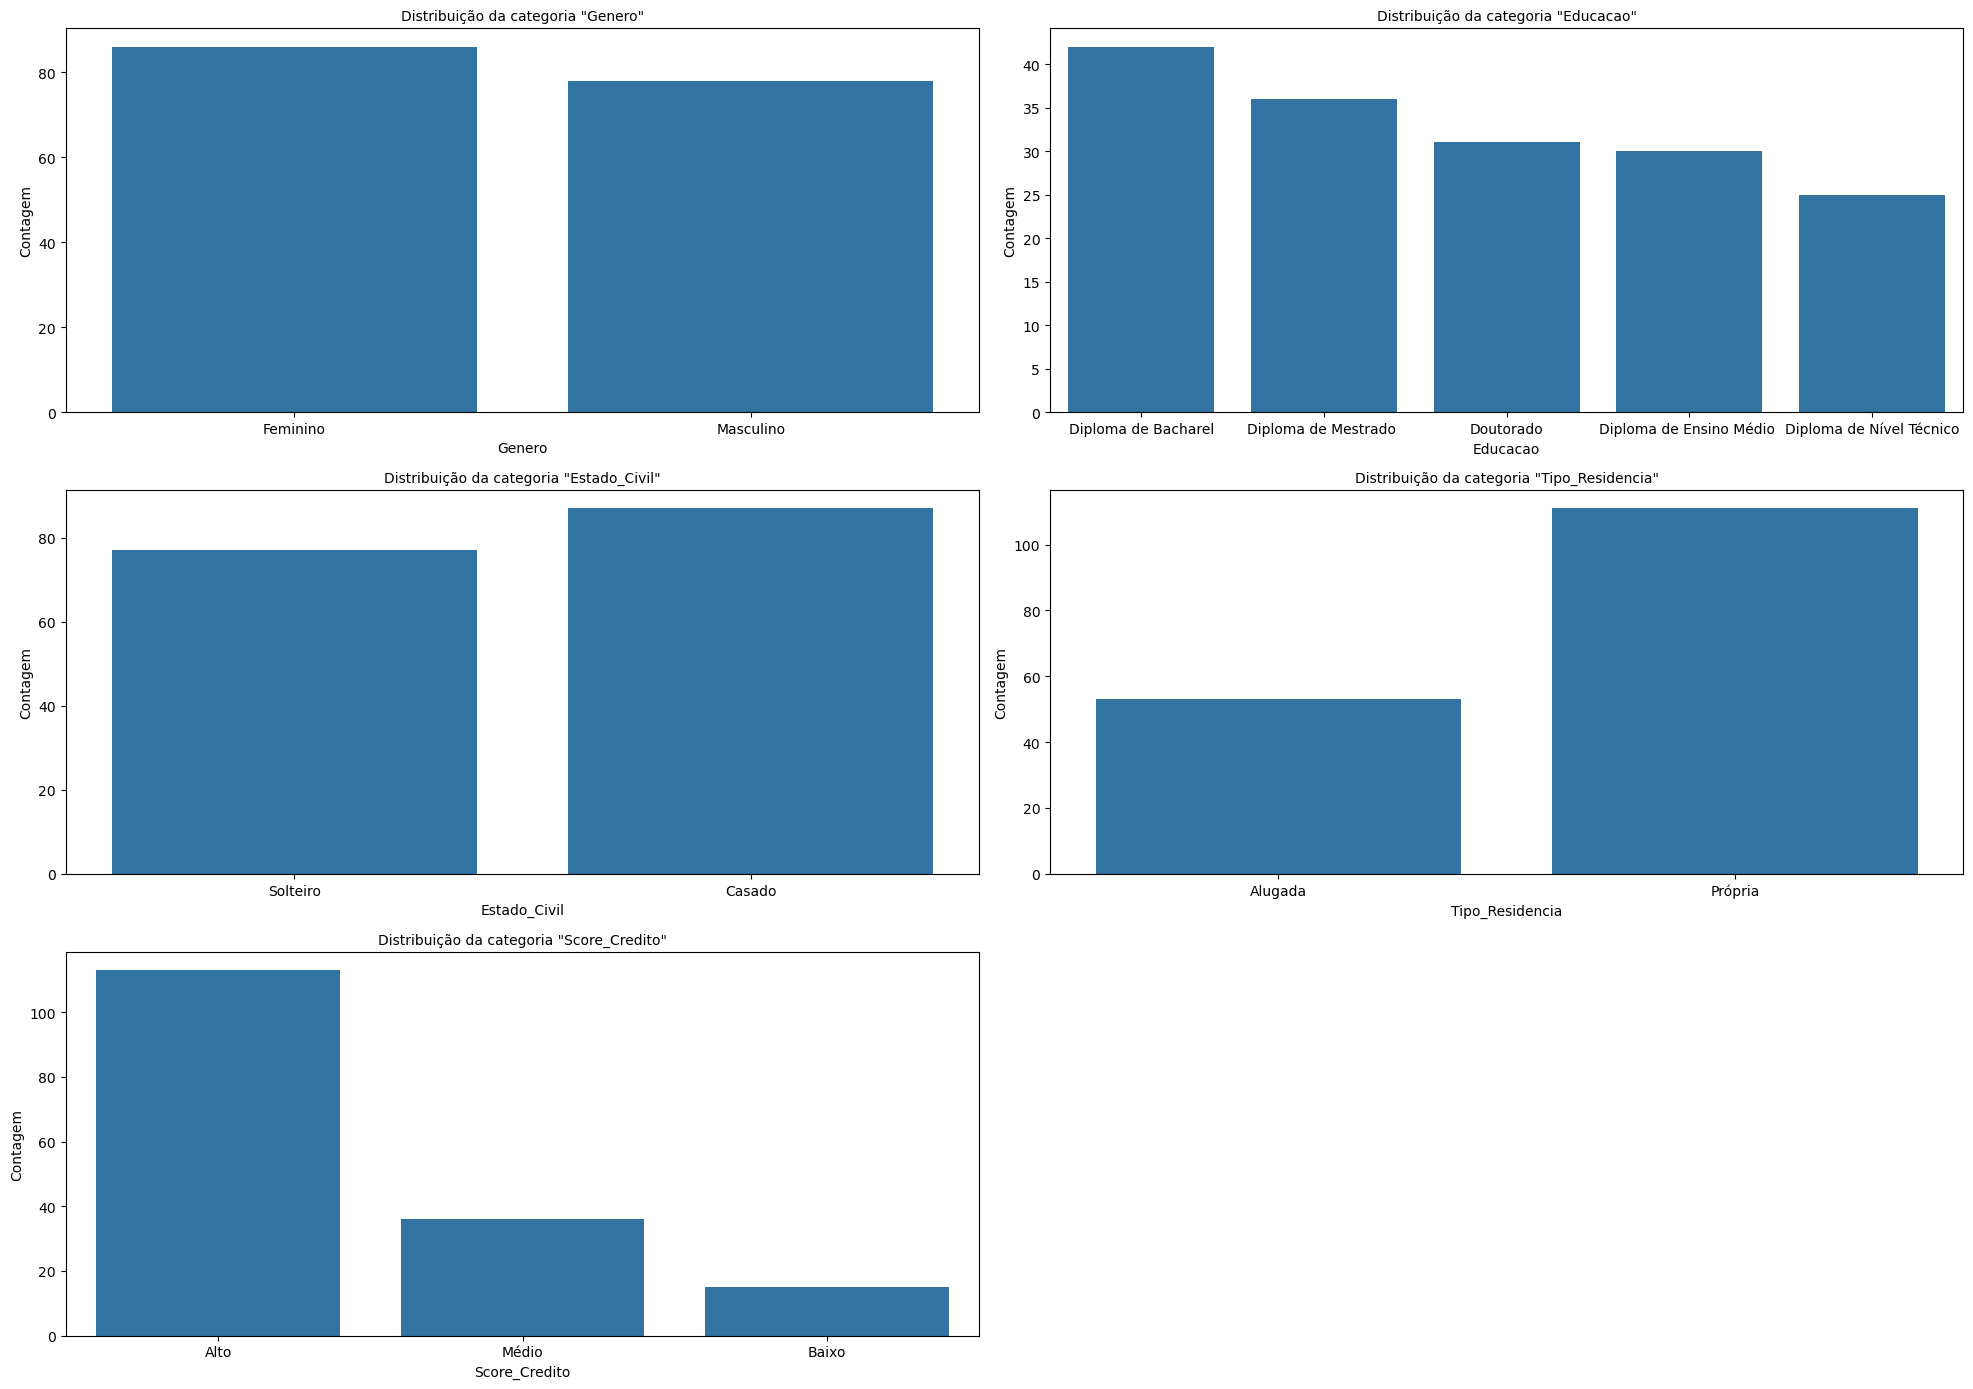

In [180]:
#seu código aqui
# Definir lista das colunas a serem plotadas
colunas = [
    'Genero', 'Educacao', 'Estado_Civil',
    'Tipo_Residencia', 'Score_Credito'
]

# Criar uma figura com tamanho adequado
plt.figure(figsize=(20, 14))

# Loop para criar o subplot
for i, coluna in enumerate(colunas, 1):
    plt.subplot(3, 2 , i)
    sns.countplot(data=df, x=coluna)
    plt.title(f'Distribuição da categoria "{coluna}"', fontsize=10)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')

plt.tight_layout() # Ajusta o espaçamento entre gráficos
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [ ]:
#seu código aqui

Não foram encontradas colunas com outliers.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



##### Análise 1:

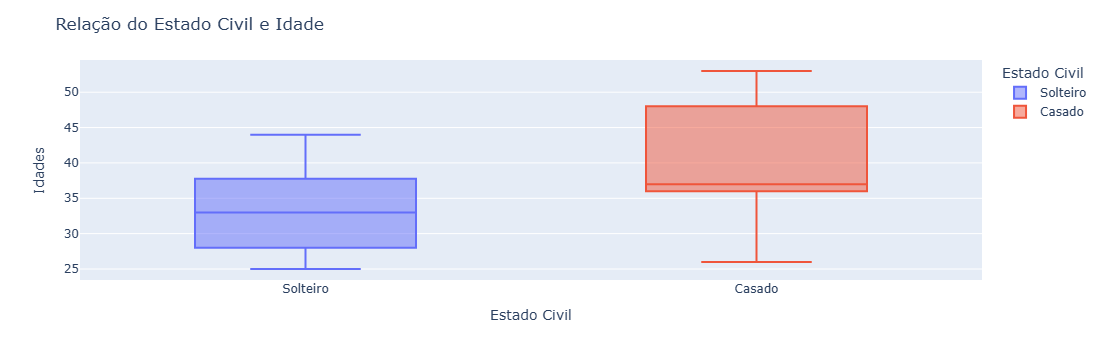

In [195]:
#seu código aqui
fig = px.box(df, x='Estado_Civil', y='Idade', color='Estado_Civil')
fig.update_layout(title='Relação do Estado Civil e Idade',
                  xaxis_title='Estado Civil',
                  yaxis_title='Idades',
                  legend_title='Estado Civil')
fig.show()

**Insights:** Clientes com faixa etária mais elevada tendem a ser casados, enquanto clientes mais jovens tendem a ser solteiros.

##### Análise 2:

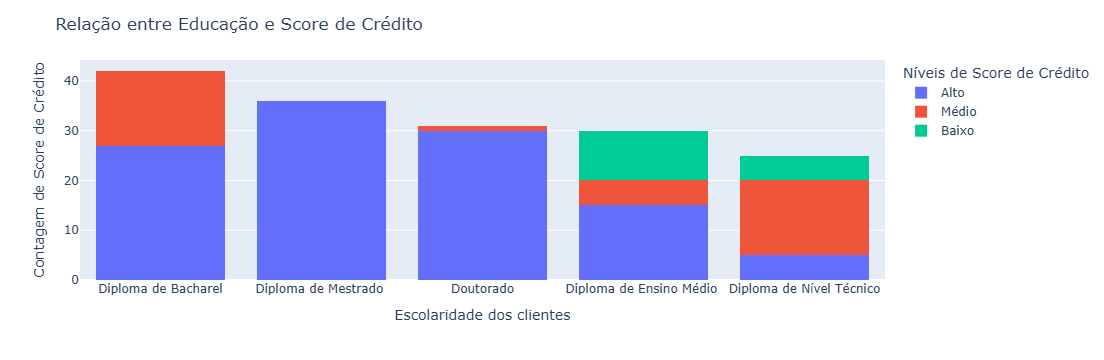

In [201]:
fig = px.histogram(df, x='Educacao', color='Score_Credito', barmode='stack')
fig.update_layout(title='Relação entre Educação e Score de Crédito',
                  xaxis_title='Escolaridade dos clientes',
                  yaxis_title='Contagem de Score de Crédito',
                  legend_title='Níveis de Score de Crédito')
fig.show()

**Insghts:** Clientes com maior score de crédito, em sua maioria, possuem formação acadêmica mais elevada, como mestrado, doutorado e bacharelado. Já os clientes com score de crédito baixo tendem a ter apenas ensino médio e formação técnica. Há mais bacharéis entre os clientes, e todos os clientes com mestrado, apresentam score de crédito alto.

##### Análise 3:

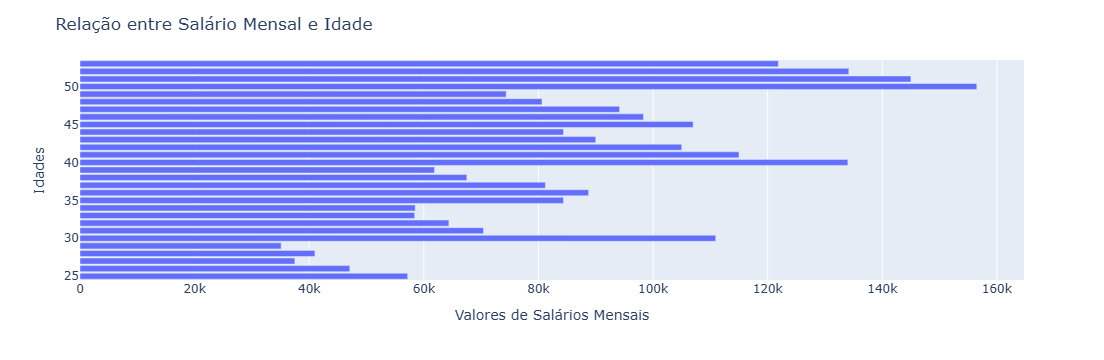

In [202]:
# Agrupamento das váriaveis 
salario_por_idade = df.groupby('Idade')['Salario_Mensal'].mean().reset_index()

fig = px.bar(salario_por_idade, x='Salario_Mensal', y='Idade', orientation='h')
fig.update_layout(title='Relação entre Salário Mensal e Idade',
                  xaxis_title='Valores de Salários Mensais',
                  yaxis_title='Idades')
fig.show()

**Insights:** Sim, clientes em faixas etárias mais elevadas tendem a apresentar salários mensais maiores do que os mais jovens. O marco que separa essas faixas etárias em relação aos salários é, em geral, a idade de 40 anos, a partir dai é possivel observar uma diferença mais significativa.

##### Análise 4:

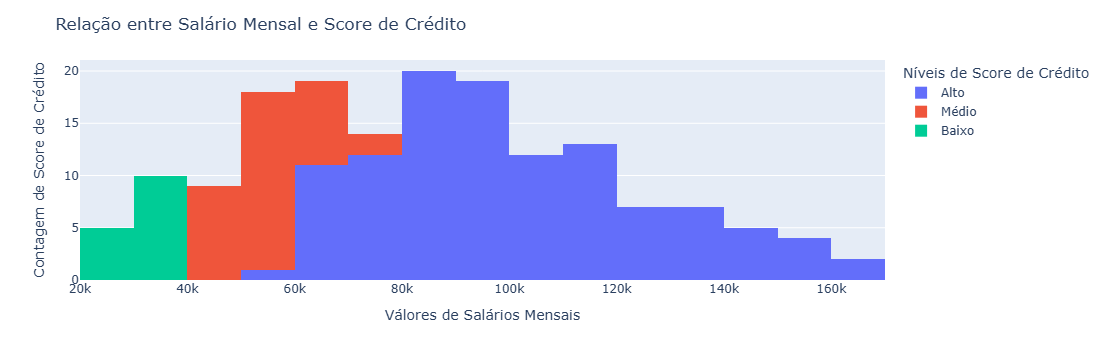

In [203]:
fig = px.histogram(df, x='Salario_Mensal', color='Score_Credito', barmode='stack')
fig.update_layout(title='Relação entre Salário Mensal e Score de Crédito',
                  xaxis_title='Válores de Salários Mensais',
                  yaxis_title='Contagem de Score de Crédito',
                  legend_title='Níveis de Score de Crédito')
fig.show()

**Insights:** Sim, em sua maioria, os clientes com salários mensais mais altos apresentam score de crédito elevado, enquanto aqueles com salários mensais razoáveis ou mais baixos tendem a possuir score de crédito médio ou baixo. Há mais clientes com score de crédito alto do que com score médio e baixo.

##### Análise 5:

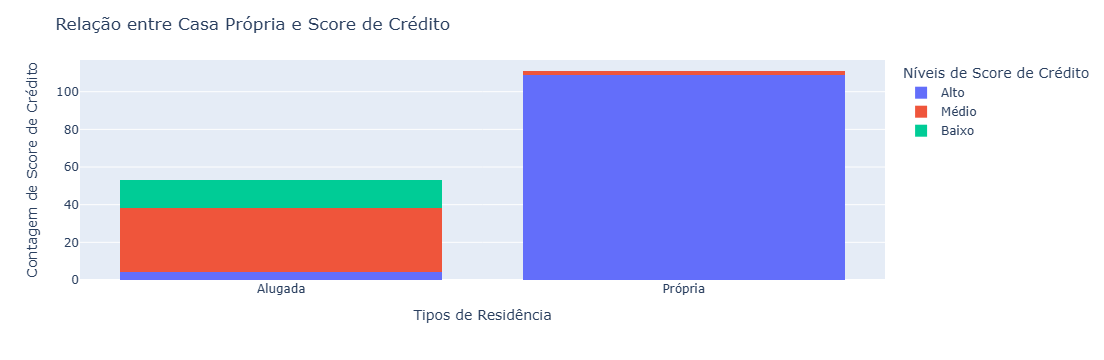

In [205]:
fig = px.histogram(df, x='Tipo_Residencia', color='Score_Credito', barmode='stack')
fig.update_layout(title='Relação entre Casa Própria e Score de Crédito',
                  xaxis_title='Tipos de Residência',
                  yaxis_title='Contagem de Score de Crédito',
                  legend_title='Níveis de Score de Crédito')
fig.show()

**Insights:** Sim, clientes com casa própria tendem a ter um nível de score mais alto, enquando os clientes que moram de aluguel tendem a apresentar níveis de score médio e baixo. A maioria dos clientes possui casa própria.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [ ]:
# seu código aqui

##### 1 - Clientes que possuem filhos influencia no score de credito?

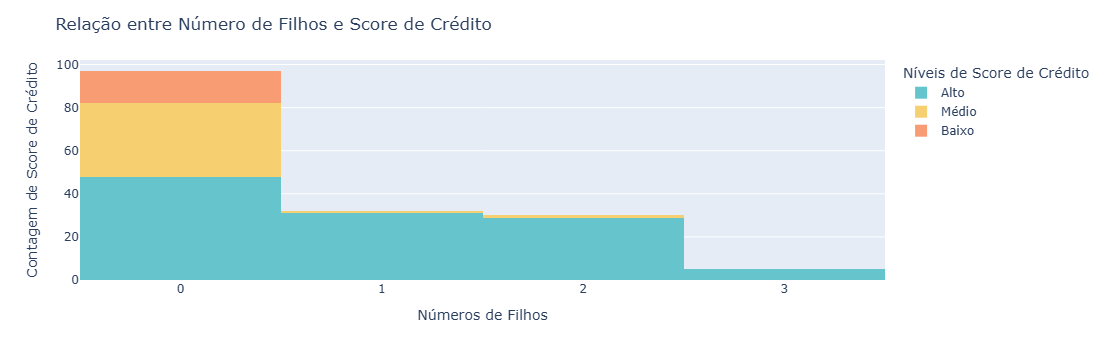

In [206]:
fig = px.histogram(df, x='Numero_Filhos', 
                   color='Score_Credito', 
                   barmode='stack',
                   color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(title='Relação entre Número de Filhos e Score de Crédito',
                  xaxis_title='Números de Filhos',
                  yaxis_title='Contagem de Score de Crédito',
                  legend_title='Níveis de Score de Crédito',
                  xaxis=dict(dtick=1)
)
fig.show()

**Insights:** Há uma maior quantidade de clientes que não possuem filhos. Apesar disso, esse grupo apresenta uma grande variação de score de crédito, com clientes classificados em score alto, médio e baixo. Já os clientes que possuem entre 1 a 3 filhos aparentam ser mais estáveis, pois, em sua grande maioria, apresentam score de crédito alto.

##### 2 - Existe diferença no salário anual entre clientes do gênero masculino e feminino?

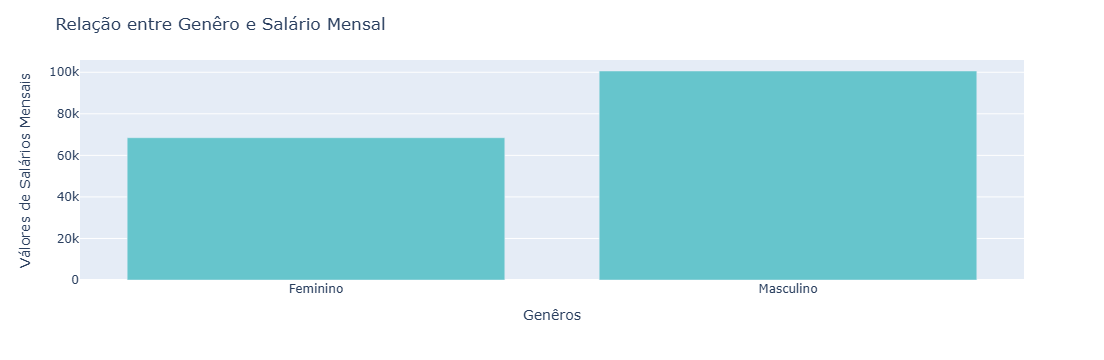

In [209]:
# Agrupamento das váriaveis
salario_por_genero = df.groupby('Genero')['Salario_Mensal'].mean().reset_index()

fig = px.bar(salario_por_genero, x='Genero', y='Salario_Mensal',
             color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(title='Relação entre Genêro e Salário Mensal',
                  xaxis_title='Genêros',
                  yaxis_title='Válores de Salários Mensais'
)
fig.show()

**Insights:** Os clientes do gênero masculino apresentam, em média, salário mensal maior do que o das clientes do gênero feminino.

##### 3 - Qual o perfil dos clientes e seus respectivos score?

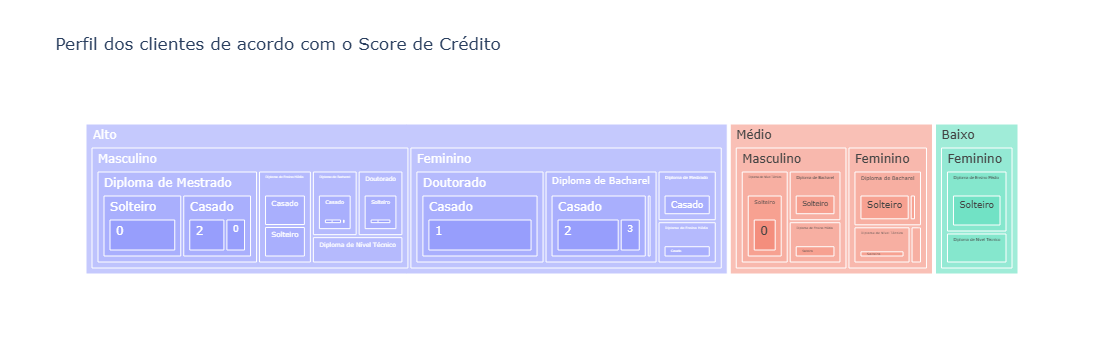

In [210]:
fig = px.treemap(
    data_frame=df,
    path=['Score_Credito', 'Genero', 'Educacao', 'Estado_Civil', 'Numero_Filhos', 'Tipo_Residencia', 'Idade'],  # Hierarquia
    title='Perfil dos clientes de acordo com o Score de Crédito'
)
fig.show()

**Insights:** Segue traçado o perfil dos clientes. A partir dele, é possível obter diversos insights, bem como confirmar análises e gráficos anteriores. Um dos principais achados é que o perfil mais associado ao score de crédito baixo corresponde, em sua maioria, a mulheres, com ensino médio ou técnico, solteiras, sem filhos, que moram de aluguel e estão, geralmente, na faixa etária entre 27 e 37 anos. A análise detalhada desses perfis permite identificar outros padrões relevantes e aprofundar a compreensão do comportamento dos clientes.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [227]:
#seu código aqui
df.select_dtypes(include=['number']).corr()

,Idade,Salario_Mensal,Numero_Filhos
Idade,1.000000,0.621599,0.071556
Salario_Mensal,0.621599,1.000000,0.084547
Numero_Filhos,0.071556,0.084547,1.000000


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [ ]:
# sua justificativa aqui

Foi identificada uma correlação moderada entre idade e renda (≈ 0,62), indicando que pessoas mais velhas tendem a ter rendimentos maiores, o que é coerente com maior experiência e estabilidade profissional. Já o número de filhos apresenta correlação fraca com idade (≈ 0,07) e renda (≈ 0,08), mostrando que não há relação linear relevante entre essas variáveis.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [228]:
#seu código aqui
# Tratamento das colunas categóricas 
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Colunas a serem transformadas com Labela Encoder (colunas binárias)
colunas_encoder = ['Genero', 'Estado_Civil', 'Tipo_Residencia']

# Aplicando o Label Encoder em cada coluna
for col in colunas_encoder:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Aplicar o One Hot nas colunas "Education e Credit Score"
df = pd.get_dummies(df, columns=['Educacao', 'Score_Credito'],
                     drop_first=False)

print(df)

     Idade     Genero  Salario_Mensal Estado_Civil  Numero_Filhos  \
0       25   Feminino         50000.0     Solteiro              0   
1       30  Masculino        100000.0       Casado              2   
2       35   Feminino         75000.0       Casado              1   
3       40  Masculino        125000.0     Solteiro              0   
4       45   Feminino        100000.0       Casado              3   
..     ...        ...             ...          ...            ...   
159     29   Feminino         27500.0     Solteiro              0   
160     34  Masculino         47500.0     Solteiro              0   
161     39   Feminino         62500.0       Casado              2   
162     44  Masculino         87500.0     Solteiro              0   
163     49   Feminino         77500.0       Casado              1   

    Tipo_Residencia  Genero_encoded  Estado_Civil_encoded  \
0           Alugada               0                     1   
1           Própria               1              

In [229]:
# Exclusão das colunas categóricas
df = df.drop(['Genero', 'Estado_Civil', 'Tipo_Residencia'], axis=1)
print(df)

     Idade  Salario_Mensal  Numero_Filhos  Genero_encoded  \
0       25         50000.0              0               0   
1       30        100000.0              2               1   
2       35         75000.0              1               0   
3       40        125000.0              0               1   
4       45        100000.0              3               0   
..     ...             ...            ...             ...   
159     29         27500.0              0               0   
160     34         47500.0              0               1   
161     39         62500.0              2               0   
162     44         87500.0              0               1   
163     49         77500.0              1               0   

     Estado_Civil_encoded  Tipo_Residencia_encoded  \
0                       1                        0   
1                       0                        1   
2                       0                        1   
3                       1                        1 

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [233]:
#seu código aqui
df[['Genero_encoded', 'Estado_Civil_encoded', 'Tipo_Residencia_encoded', 'Educacao_Diploma de Nível Técnico',
    'Educacao_Diploma de Bacharel', 'Educacao_Doutorado', 'Educacao_Diploma de Ensino Médio ', 'Educacao_Diploma de Mestrado ',
    'Score_Credito_Médio', 'Score_Credito_Alto', 'Score_Credito_Baixo']].corr()

,Genero_encoded,Estado_Civil_encoded,Tipo_Residencia_encoded,Educacao_Diploma de Nível Técnico,Educacao_Diploma de Bacharel,Educacao_Doutorado,Educacao_Diploma de Ensino Médio,Educacao_Diploma de Mestrado,Score_Credito_Médio,Score_Credito_Alto,Score_Credito_Baixo
Genero_encoded,1.000000,0.278362,0.031519,0.105632,-0.223104,-0.272675,0.023108,0.379875,0.114394,0.085886,-0.302169
Estado_Civil_encoded,0.278362,1.000000,-0.708374,0.280839,-0.132109,-0.266960,0.186919,-0.026638,0.504681,-0.661313,0.337261
Tipo_Residencia_encoded,0.031519,-0.708374,1.000000,-0.432384,-0.072490,0.300305,-0.178899,0.334958,-0.704488,0.915900,-0.459173
Educacao_Diploma de Nível Técnico,0.105632,0.280839,-0.432384,1.000000,-0.248833,-0.204747,-0.200665,-0.224910,0.389844,-0.448036,0.159678
Educacao_Diploma de Bacharel,-0.223104,-0.132109,-0.072490,-0.248833,1.000000,-0.283269,-0.277621,-0.311165,0.195096,-0.058519,-0.186165
Educacao_Doutorado,-0.272675,-0.266960,0.300305,-0.204747,-0.283269,1.000000,-0.228435,-0.256036,-0.218411,0.290696,-0.153182
Educacao_Diploma de Ensino Médio,0.023108,0.186919,-0.178899,-0.200665,-0.277621,-0.228435,1.000000,-0.250931,-0.060409,-0.193217,0.397004
Educacao_Diploma de Mestrado,0.379875,-0.026638,0.334958,-0.224910,-0.311165,-0.256036,-0.250931,1.000000,-0.281250,0.356281,-0.168267
Score_Credito_Médio,0.114394,0.504681,-0.704488,0.389844,0.195096,-0.218411,-0.060409,-0.281250,1.000000,-0.789406,-0.168267
Score_Credito_Alto,0.085886,-0.661313,0.915900,-0.448036,-0.058519,0.290696,-0.193217,0.356281,-0.789406,1.000000,-0.472288


**Resumo das correlações mais fortes identificadas:**

- Tipo de Residência × Score de Crédito: Forte correlação com Score de Crédito Médio (0,70) e forte correlação negativa com Score de Crédito Alto (-0,91). Indicando que o tipo de residência exerce influência relevante na distribuição do score de crédito.

- Estado Civil × Tipo de Residência: Correlação forte (0,71), mostrando que estado civil está fortemente relacionado à posse de imóvel.

- Estado Civil × Score de Crédito Alto: Correlação negativa forte (-0,66), sugerindo que determinados estados civis têm menor probabilidade de score alto.

**Nível de Escolaridade × Score de Crédito:**

- Formação Técnina tem correlação moderada com Score de Crédito Médio (0,39).

- Mestrado tem correlação positiva com Score de Crédito Alto (0,36).

- Diploma do Ensino Médio se associa mais a Score de Crédito Baixo (0,40).

Conclui-se que as variáveis mais relacionadas ao Score de Crédito são Tipo de Residência, Estado Civil e Nível de Escolaridade, sendo o tipo de residência o fator mais fortemente associado às variações de score.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

Como a correlação das variáveis categóricas já foi realizada, a coluna Score de Crédito foi incluída e tratada por meio de One-Hot Encoding, sendo dividida em três colunas. No entanto, como essa variável será a preditora no treinamento e teste de machine learning, torna-se mais adequado reconvertê-la para uma única coluna.

In [234]:
#seu código aqui
import numpy as np

# Transformando as colunas de score de crédito em uma novamente
df['Score_Credito'] = np.select([
    df['Score_Credito_Médio'],
    df['Score_Credito_Alto'],
    df['Score_Credito_Baixo']],
    ['Médio', 'Alto', 'Baixo'],
    default='Unknown'
)

In [235]:
# Separar os dados em features (X) e o alvo (y)
x = df.drop('Score_Credito', axis=1)
y = df['Score_Credito']

In [236]:
from sklearn.model_selection import train_test_split

# Separar os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.25, random_state=42)

In [237]:
x_train

,Idade,Salario_Mensal,Numero_Filhos,Genero_encoded,Estado_Civil_encoded,Tipo_Residencia_encoded,Educacao_Diploma de Bacharel,Educacao_Diploma de Ensino Médio,Educacao_Diploma de Mestrado,Educacao_Diploma de Nível Técnico,Educacao_Doutorado,Score_Credito_Alto,Score_Credito_Baixo,Score_Credito_Médio
141,26,45000.0,0,0,1,0,False,False,False,True,False,False,False,True
117,29,27500.0,0,0,1,0,False,True,False,False,False,False,True,False
93,25,62500.0,0,0,1,0,True,False,False,False,False,False,False,True
133,29,68000.0,2,0,0,1,False,False,False,False,True,False,False,True
36,31,65000.0,0,1,1,0,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46,97500.0,1,0,0,1,False,True,False,False,False,True,False,False
106,32,57500.0,0,1,1,0,False,False,False,True,False,False,False,True
14,37,70000.0,2,0,0,1,True,False,False,False,False,True,False,False
92,37,85000.0,1,0,0,1,False,False,False,False,True,True,False,False


In [238]:
x_test

,Idade,Salario_Mensal,Numero_Filhos,Genero_encoded,Estado_Civil_encoded,Tipo_Residencia_encoded,Educacao_Diploma de Bacharel,Educacao_Diploma de Ensino Médio,Educacao_Diploma de Mestrado,Educacao_Diploma de Nível Técnico,Educacao_Doutorado,Score_Credito_Alto,Score_Credito_Baixo,Score_Credito_Médio
135,25,55000.0,0,0,1,0,True,False,False,False,False,False,False,True
115,48,87500.0,1,0,0,1,False,False,False,False,True,True,False,False
131,26,55000.0,1,0,0,1,True,False,False,False,False,False,False,True
55,39,62500.0,2,0,0,1,True,False,False,False,False,True,False,False
95,35,90000.0,1,0,0,1,False,False,False,False,True,True,False,False
29,25,55000.0,0,0,1,0,True,False,False,False,False,False,False,True
157,48,82500.0,1,0,0,1,False,False,False,False,True,True,False,False
51,48,82500.0,1,0,0,1,False,False,False,False,True,True,False,False
101,36,95000.0,2,0,0,1,False,False,True,False,False,True,False,False
145,37,95000.0,1,0,0,1,False,True,False,False,False,True,False,False


In [239]:
y_train

141    Médio
117    Baixo
93     Médio
133    Médio
36     Médio
       ...  
71      Alto
106    Médio
14      Alto
92      Alto
102     Alto
Name: Score_Credito, Length: 123, dtype: object

In [240]:
y_test

135    Médio
115     Alto
131    Médio
55      Alto
95      Alto
29     Médio
157     Alto
51      Alto
101     Alto
145     Alto
19     Médio
85     Baixo
15      Alto
66      Alto
24     Baixo
30      Alto
132     Alto
105    Baixo
152     Alto
16      Alto
75      Alto
18     Baixo
12     Baixo
9       Alto
31      Alto
155     Alto
98      Alto
56      Alto
134     Alto
160    Médio
139     Alto
78      Alto
60      Alto
84      Alto
2       Alto
94      Alto
45      Alto
42     Médio
69      Alto
153    Baixo
26      Alto
Name: Score_Credito, dtype: object

In [241]:
print('Tamanho de x_train:', x_train.shape)

Tamanho de x_train: (123, 14)


In [242]:
print('Tamanho de x_test:', x_test.shape)

Tamanho de x_test: (41, 14)


In [243]:
print('Tamanho de y_train:', y_train.shape)

Tamanho de y_train: (123,)


In [244]:
print('Tamanho de y_test:', y_test.shape)

Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Score_Credito'>

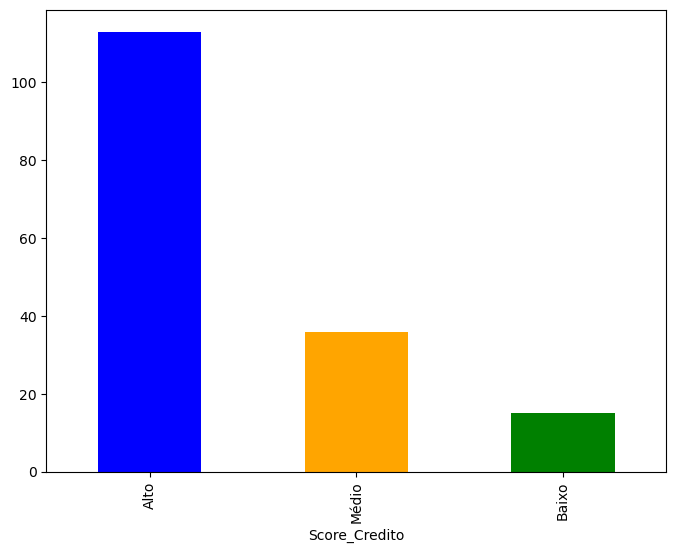

In [246]:
#seu código aqui
score_counts = df['Score_Credito'].value_counts()
plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

As colunas de score de crédito não estão balanceadas, pois há uma grande discrepância no score alto em comparação com os scores médio e baixo

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [247]:
#seu código aqui
from imblearn.over_sampling import SMOTE

# Criação de uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicação do SMOTE aos dados de treinamento (x_train, y_train)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Verificação da distibuição das classes após balanceamento
print('Distribuição das classes após balanceamento:')
print(y_train_balanced.value_counts())

Distribuição das classes após balanceamento:
Score_Credito
Médio    84
Baixo    84
Alto     84
Name: count, dtype: int64
